In [1]:
# fmt: off
import urllib
from IPython.display import Markdown as md

### change to reflect your notebook
_nb_loc = "03_image_models/diagrams.ipynb"
_nb_title = "Diagrams"
_icons=["https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png", "https://www.tensorflow.org/images/colab_logo_32px.png", "https://www.tensorflow.org/images/GitHub-Mark-32px.png", "https://www.tensorflow.org/images/download_logo_32px.png"]
_links=["https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?" + urllib.parse.urlencode({"name": _nb_title, "download_url": "https://github.com/takumiohym/practical-ml-vision-book-ja/raw/master/"+_nb_loc}), "https://colab.research.google.com/github/takumiohym/practical-ml-vision-book-ja/blob/master/{0}".format(_nb_loc), "https://github.com/takumiohym/practical-ml-vision-book-ja/blob/master/{0}".format(_nb_loc), "https://raw.githubusercontent.com/takumiohym/practical-ml-vision-book-ja/master/{0}".format(_nb_loc)]
md("""<table class="tfo-notebook-buttons" align="left"><td><a target="_blank" href="{0}"><img src="{4}"/>Run in Vertex AI Workbench</a></td><td><a target="_blank" href="{1}"><img src="{5}" />Run in Google Colab</a></td><td><a target="_blank" href="{2}"><img src="{6}" />View source on GitHub</a></td><td><a href="{3}"><img src="{7}" />Download notebook</a></td></table><br/><br/>""".format(_links[0], _links[1], _links[2], _links[3], _icons[0], _icons[1], _icons[2], _icons[3]))
# fmt: on

<table class="tfo-notebook-buttons" align="left"><td><a target="_blank" href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?name=Diagrams&download_url=https%3A%2F%2Fgithub.com%2Ftakumiohym%2Fpractical-ml-vision-book-ja%2Fraw%2Fmaster%2F03_image_models%2Fdiagrams.ipynb"><img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/>Run in Vertex AI Workbench</a></td><td><a target="_blank" href="https://colab.research.google.com/github/takumiohym/practical-ml-vision-book-ja/blob/master/03_image_models/diagrams.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a></td><td><a target="_blank" href="https://github.com/takumiohym/practical-ml-vision-book-ja/blob/master/03_image_models/diagrams.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td><td><a href="https://raw.githubusercontent.com/takumiohym/practical-ml-vision-book-ja/master/03_image_models/diagrams.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a></td></table><br/><br/>

# 3章の図のプロッティング


In [2]:
!pip install --user tensorflow-addons==0.20.0
!pip install -U --user matplotlib

In [3]:
import os
import warnings
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

def read_and_decode(filename):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size.
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [4]:
!gsutil cat gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv | head -10

gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/14646281372_5f13794b47.jpg,sunflowers
gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg,sunflowers
gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/50987813_7484bfbcdf.jpg,sunflowers
gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/21995435890_e5672244a4_m.jpg,sunflowers
gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/14124669683_7fb74f20c3.jpg,tulips
gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/7133935763_82b17c8e1b_n.jpg,daisy
gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/9489270024_1b05f08492_m.jpg,daisy
gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/3611577717_f3a7a8c416_n.jpg,daisy
gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/4504731

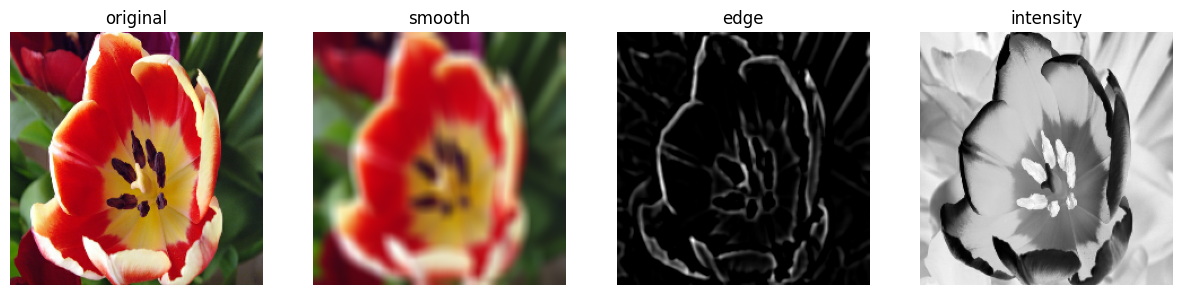

In [5]:
img = read_and_decode('gs://asl-public/practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/14124669683_7fb74f20c3.jpg')

f, ax = plt.subplots(1, 4, figsize=(15,5))

ax[0].imshow(img.numpy())
ax[0].set_title('original')
ax[0].axis('off')

mean = tfa.image.mean_filter2d(img, filter_shape=11)
ax[1].imshow(mean.numpy())
ax[1].set_title('smooth')
ax[1].axis('off')

edge = tf.clip_by_value(tf.image.rgb_to_grayscale(
    tfa.image.mean_filter2d(img, filter_shape=5) - tfa.image.mean_filter2d(img, filter_shape=11)
), 0, 1)
ax[2].imshow(edge.numpy(), cmap='gray')
ax[2].set_title('edge')
ax[2].axis('off')

bw_img = 1.0 - tf.image.rgb_to_grayscale(img)
ax[3].imshow(bw_img.numpy(), cmap='gray')
ax[3].set_title('intensity')
ax[3].axis('off');

## License
Copyright 2022 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.